# Análise de algoritmos na clasificação de spam

## Imports, análises e train_test_split

In [ ]:
import pandas as pd

In [ ]:
columns_name = ['word_freq_' + str(i) for i in range(1, 49)]+ ['char_freq_' + str(i) for i in range(1, 7)] + ['capital_run_length_average','capital_run_length_longest','capital_run_length_total'] + ['class_']
from google.colab import drive
drive.mount('/content/gdrive')
df_spam = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Bases/spambase.data",names=columns_name)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_spam

,word_freq_1,word_freq_2,word_freq_3,word_freq_4,word_freq_5,word_freq_6,word_freq_7,word_freq_8,word_freq_9,word_freq_10,word_freq_11,word_freq_12,word_freq_13,word_freq_14,word_freq_15,word_freq_16,word_freq_17,word_freq_18,word_freq_19,word_freq_20,word_freq_21,word_freq_22,word_freq_23,word_freq_24,word_freq_25,word_freq_26,word_freq_27,word_freq_28,word_freq_29,word_freq_30,word_freq_31,word_freq_32,word_freq_33,word_freq_34,word_freq_35,word_freq_36,word_freq_37,word_freq_38,word_freq_39,word_freq_40,word_freq_41,word_freq_42,word_freq_43,word_freq_44,word_freq_45,word_freq_46,word_freq_47,word_freq_48,char_freq_1,char_freq_2,char_freq_3,char_freq_4,char_freq_5,char_freq_6,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class_
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_1                 4601 non-null   float64
 1   word_freq_2                 4601 non-null   float64
 2   word_freq_3                 4601 non-null   float64
 3   word_freq_4                 4601 non-null   float64
 4   word_freq_5                 4601 non-null   float64
 5   word_freq_6                 4601 non-null   float64
 6   word_freq_7                 4601 non-null   float64
 7   word_freq_8                 4601 non-null   float64
 8   word_freq_9                 4601 non-null   float64
 9   word_freq_10                4601 non-null   float64
 10  word_freq_11                4601 non-null   float64
 11  word_freq_12                4601 non-null   float64
 12  word_freq_13                4601 non-null   float64
 13  word_freq_14                4601 

0    2788
1    1813
Name: class_, dtype: int64

0    0.605955
1    0.394045
Name: class_, dtype: float64



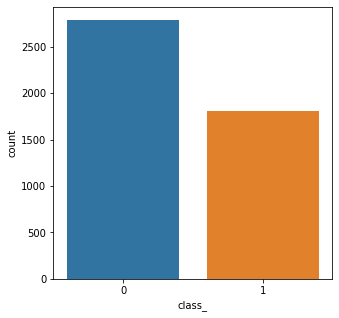

In [ ]:
# Visualização numérica das distribuições de cada classe.

values = df_spam['class_'].value_counts()
print(values)
print()

values = df_spam['class_'].value_counts(normalize=True)
print(values)
print()

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
sns.countplot(x="class_",data=df_spam)
plt.show()

In [ ]:
X = df_spam[columns_name[:-1]]
y = df_spam[['class_']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3220, 57)
(1381, 57)


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# score = ['accuracy','precision','recall','f1']
# score = 'recall'

# param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
param_grid = {'n_neighbors': range(2, 15)}

grid_knn = GridSearchCV(knn, param_grid, n_jobs=-1)
# grid_knn = GridSearchCV(knn, param_grid, scoring=score, n_jobs=-1)
# grid_knn = GridSearchCV(knn, param_grid, scoring=score, n_jobs=-1, refit='precision')

grid_knn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(2, 15)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
grid_knn.score(X_test,y_test)

0.8001448225923244

In [ ]:
# grid_knn.cv_results_
# grid_knn.best_estimator_
# grid_knn.best_score_
grid_knn.best_params_
# grid_knn.best_index_
# grid_knn.scorer_
# grid_knn.n_splits_
# grid_knn.refit_time_

{'n_neighbors': 3}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.8001448225923244

In [ ]:
y_pred = knn.predict(X_test)
y_true = y_test

from sklearn.metrics import classification_report
# print(classification_report(y_true'', y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

print('confusion_matrix')
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       831
           1       0.75      0.75      0.75       550

    accuracy                           0.80      1381
   macro avg       0.79      0.79      0.79      1381
weighted avg       0.80      0.80      0.80      1381

confusion_matrix
[[694 137]
 [139 411]]


In [ ]:
y_pred = grid_knn.predict(X_test)
y_true = y_test

from sklearn.metrics import accuracy_score
print("accuracy_score:", "%0.3f" % accuracy_score(y_true, y_pred))

from sklearn.metrics import precision_score
print("precision_score:", "%0.3f" % precision_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("recall_score:", "%0.3f" % recall_score(y_true, y_pred))

from sklearn.metrics import f1_score
print("f1_score:", "%0.3f" % f1_score(y_true, y_pred,))

accuracy_score: 0.800
precision_score: 0.750
recall_score: 0.747
f1_score: 0.749


## SVC

In [ ]:
# Tempo de funcionamento do algoritmo
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 00:33:39


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# svc = SVC(random_state=84, max_iter=1000000)
svc = SVC(random_state=84)

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'sigmoid']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['rbf']},
 ]

grid_svc = GridSearchCV(svc, param_grid, n_jobs=-1)

# grid_svc.fit(X_train, y_train)
grid_svc.fit(X_train_minmax, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=84, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'kernel': ['linear', 'poly', 'sigmoid']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Tempo de funcionamento do algoritmo
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 00:34:25


In [ ]:
grid_svc.score(X_test_minmax,y_test)

0.939174511223751

In [ ]:
# grid_svc.cv_results_
# grid_svc.best_estimator_
# grid_svc.best_score_
grid_svc.best_params_
# grid_svc.best_index_
# grid_svc.scorer_
# grid_svc.n_splits_
# grid_svc.refit_time_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=84, C=1000, gamma=0.1, kernel='rbf')
svc.fit(X_train_minmax, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=84, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc.score(X_test_minmax, y_test)

0.939174511223751

In [ ]:
y_pred = svc.predict(X_test_minmax)
y_true = y_test

from sklearn.metrics import classification_report
# print(classification_report(y_true'', y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

print('confusion_matrix')
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       831
           1       0.92      0.93      0.92       550

    accuracy                           0.94      1381
   macro avg       0.94      0.94      0.94      1381
weighted avg       0.94      0.94      0.94      1381

confusion_matrix
[[787  44]
 [ 40 510]]


In [ ]:
y_pred = svc.predict(X_test_minmax)
y_true = y_test

from sklearn.metrics import accuracy_score
print("accuracy_score:", "%0.3f" % accuracy_score(y_true, y_pred))

from sklearn.metrics import precision_score
print("precision_score:", "%0.3f" % precision_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("recall_score:", "%0.3f" % recall_score(y_true, y_pred))

from sklearn.metrics import f1_score
print("f1_score:", "%0.3f" % f1_score(y_true, y_pred,))

accuracy_score: 0.939
precision_score: 0.921
recall_score: 0.927
f1_score: 0.924


## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=84)

param_grid = {'max_depth': range(1, 100)}

grid_dtc = GridSearchCV(dtc, param_grid, n_jobs=-1)

grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=84,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 100)}, pre_dispatch='2*n_jobs',


In [ ]:
grid_dtc.score(X_test,y_test)

0.9145546705286025

In [ ]:
# grid_dtc.cv_results_
# grid_dtc.best_estimator_
# grid_dtc.best_score_
grid_dtc.best_params_
# grid_dtc.best_index_
# grid_dtc.scorer_
# grid_dtc.n_splits_
# grid_dtc.refit_time_

{'max_depth': 10}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=84,max_depth=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

In [ ]:
dtc.score(X_test,y_test)

0.9145546705286025

In [ ]:
y_pred = dtc.predict(X_test)
y_true = y_test

from sklearn.metrics import classification_report
# print(classification_report(y_true'', y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

print('confusion_matrix')
print(cm)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       831
           1       0.90      0.89      0.89       550

    accuracy                           0.91      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.91      0.91      0.91      1381

confusion_matrix
[[776  55]
 [ 63 487]]


In [ ]:
y_pred = dtc.predict(X_test)
y_true = y_test

from sklearn.metrics import accuracy_score
print("accuracy_score:", "%0.3f" % accuracy_score(y_true, y_pred))

from sklearn.metrics import precision_score
print("precision_score:", "%0.3f" % precision_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("recall_score:", "%0.3f" % recall_score(y_true, y_pred))

from sklearn.metrics import f1_score
print("f1_score:", "%0.3f" % f1_score(y_true, y_pred,))

accuracy_score: 0.915
precision_score: 0.899
recall_score: 0.885
f1_score: 0.892


## Naive Bayes

### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb.score(X_test,y_test)

0.8298334540188269

In [ ]:
y_pred = gnb.predict(X_test)
y_true = y_test

from sklearn.metrics import classification_report
# print(classification_report(y_true'', y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

print('confusion_matrix')
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       831
           1       0.71      0.96      0.82       550

    accuracy                           0.83      1381
   macro avg       0.84      0.85      0.83      1381
weighted avg       0.86      0.83      0.83      1381

confusion_matrix
[[618 213]
 [ 22 528]]


In [ ]:
y_pred = gnb.predict(X_test)
y_true = y_test

from sklearn.metrics import accuracy_score
print("accuracy_score:", "%0.3f" % accuracy_score(y_true, y_pred))

from sklearn.metrics import precision_score
print("precision_score:", "%0.3f" % precision_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("recall_score:", "%0.3f" % recall_score(y_true, y_pred))

from sklearn.metrics import f1_score
print("f1_score:", "%0.3f" % f1_score(y_true, y_pred,))

accuracy_score: 0.830
precision_score: 0.713
recall_score: 0.960
f1_score: 0.818


### MultinomialNB

MultinomialNB classifica melhor os textos que não são spam, porém tb tem um uma boa classificação nos textos que são spam.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb.score(X_test,y_test)

0.8204199855177408

In [ ]:
y_pred = mnb.predict(X_test)
y_true = y_test

from sklearn.metrics import classification_report
# print(classification_report(y_true'', y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

print('confusion_matrix')
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       831
           1       0.76      0.80      0.78       550

    accuracy                           0.82      1381
   macro avg       0.81      0.82      0.81      1381
weighted avg       0.82      0.82      0.82      1381

confusion_matrix
[[695 136]
 [112 438]]


In [ ]:
y_pred = mnb.predict(X_test)
y_true = y_test

from sklearn.metrics import accuracy_score
print("accuracy_score:", "%0.3f" % accuracy_score(y_true, y_pred))

from sklearn.metrics import precision_score
print("precision_score:", "%0.3f" % precision_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("recall_score:", "%0.3f" % recall_score(y_true, y_pred))

from sklearn.metrics import f1_score
print("f1_score:", "%0.3f" % f1_score(y_true, y_pred,))

accuracy_score: 0.820
precision_score: 0.763
recall_score: 0.796
f1_score: 0.779


### ComplementNB

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [ ]:
cnb.score(X_test,y_test)

0.8204199855177408

In [ ]:
y_pred = cnb.predict(X_test)
y_true = y_test

from sklearn.metrics import classification_report
# print(classification_report(y_true'', y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

print('confusion_matrix')
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       831
           1       0.76      0.81      0.78       550

    accuracy                           0.82      1381
   macro avg       0.81      0.82      0.81      1381
weighted avg       0.82      0.82      0.82      1381

confusion_matrix
[[687 144]
 [104 446]]


In [ ]:
y_pred = cnb.predict(X_test)
y_true = y_test

from sklearn.metrics import accuracy_score
print("accuracy_score:", "%0.3f" % accuracy_score(y_true, y_pred))

from sklearn.metrics import precision_score
print("precision_score:", "%0.3f" % precision_score(y_true, y_pred))

from sklearn.metrics import recall_score
print("recall_score:", "%0.3f" % recall_score(y_true, y_pred))

from sklearn.metrics import f1_score
print("f1_score:", "%0.3f" % f1_score(y_true, y_pred,))

accuracy_score: 0.820
precision_score: 0.756
recall_score: 0.811
f1_score: 0.782


## Gráfico Matriz de Confusão

confusion_matrix
[[694 137]
 [139 411]]


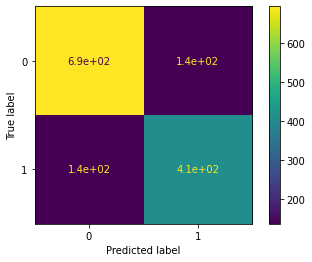

In [ ]:
# ConfusionMatrixDisplay KNN.

y_pred = knn.predict(X_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

print('confusion_matrix')
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay

# class_names = y_pred
class_names = ('0', '1')

cm_display = ConfusionMatrixDisplay(cm, class_names).plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Confusion matrix, without normalization
[[694 137]
 [139 411]]
Normalized confusion matrix
[[0.84 0.16]
 [0.25 0.75]]


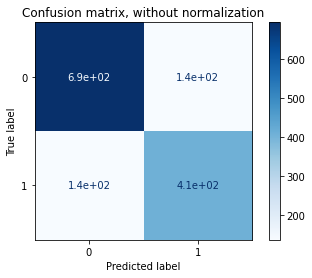

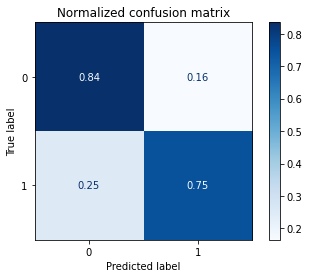

In [ ]:
# plot_confusion_matrix KNN.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

df = df_spam
X = df[columns_name[:-1]]
y = df[['class_']]

# class_names = df.class_
# class_names = y_pred
class_names = ('0', '1')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=84)

classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Validação Cruzada

In [ ]:
# Validação cruzada Naive Bayes

from sklearn.model_selection import cross_val_score

X = X_test
y = y_test

scores_gnb = cross_val_score(gnb, X, y, cv=5, scoring='accuracy', n_jobs=-1)
scores_mnb = cross_val_score(mnb, X, y, cv=5, scoring='accuracy', n_jobs=-1)
scores_cnb = cross_val_score(cnb, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Imprime a média das validações cruzadas

print("Média da Acurácia GNB: ", "%0.3f" % scores_gnb.mean())
print("Média da Acurácia MNB: ", "%0.3f" %  scores_mnb.mean())
print("Média da Acurácia CNB: ", "%0.3f" %  scores_cnb.mean())

Média da Acurácia GNB:  0.826
Média da Acurácia MNB:  0.772
Média da Acurácia CNB:  0.771


## Resposta

| Algoritmo               | Valores dos Parâmetros          | Acurácia | Precisão | Revocação | F1    |
|-------------------------|---------------------------------|----------|----------|-----------|-------|
| KNN                     | n_neighbors = 3                 | 0.800    | 0.750    | 0.747     | 0.749 |
| SVM                     | C=1000, gamma=0.1, kernel='rbf' | 0.939    | 0.921    | 0.927     | 0.924 |
| Árvore de Decisão       | max_depth=10                    | 0.915    | 0.899    | 0.885     | 0.892 |
| Gaussian Naive Bayes    |                                 | 0.830    | 0.713    | 0.960     | 0.818 |
| Multinomial Naive Bayes |                                 | 0.820    | 0.763    | 0.796     | 0.779 |
| Complement Naive Bayes  |                                 | 0.820    | 0.756    | 0.811     | 0.782 |

Analisando os resultados obtidos o modelo SVM é o melhor em quase todas as métricas, com acurácia de 93%, precisão de 92% e F1 de 92%, somente sendo batido pelo Naive Bayes Gaussiano que obteve 96% de revocação. Já analisando o relatório de classsificação individualmente o modelo Gaussiano obeteve os resultados mais altos para precisão da classe 0(textos que não são spam) com 97% e revocação da classe 1(textos que são spam) com 96%, portanto se quiséssemos classificar individualmente as classes usaríamos o gaussiano para precisão e revocação, porém, o SVM é bem próximo e bem mais balanceado entre as classes.